## This notebook is to normalised numeric features only for combined set

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set()

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('combinedoutiliers.csv')

In [3]:
df.shape

(3138, 40)

In [4]:
df.duplicated().sum() #Check for duplicate rows

0

In [5]:
df.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876.0,408.0,24.583,363.391914,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,0.550,0.023,0.107,0.062000,0.310,0.166,0.100,0.08353,0.239,0.342,11.022908,5.773744,21.546496,217.0,3469.825848,2564.36345,0.4735,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577.0
1,10224.0,1166.0,28.346,3.000000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,0.545,0.040,0.324,0.180125,0.253,0.102,0.066,0.07000,0.200,0.148,9.904099,5.773744,18.260000,181.0,2009.000000,1690.00000,0.4735,0.290,0.077,0.099099,0.202202,0.302302,0.392826,14.482893,3.048179,844.0
2,27023.0,2927.0,21.641,9.000000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,0.508,0.063,0.129,0.032000,0.296,0.215,0.087,0.07000,0.187,0.258,11.011502,5.773744,19.940000,234.0,4650.000000,1350.00000,0.4960,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700.0
3,8735.0,1039.0,23.110,0.000000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,0.545,0.038,0.207,0.084000,0.255,0.182,0.104,0.08100,0.169,0.274,12.845770,5.773744,30.310000,231.0,4420.000000,1749.00000,0.5030,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592.0
4,3681.0,365.0,21.985,2.000000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,0.474,0.034,0.177,0.075000,0.324,0.118,0.113,0.08353,0.178,0.340,11.565750,5.773744,21.546496,270.0,3469.825848,1249.00000,0.5160,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 40 columns):
population                                    3138 non-null float64
renter_occupied_households                    3138 non-null float64
pct_renter_occupied                           3138 non-null float64
evictions                                     3138 non-null float64
rent_burden                                   3138 non-null float64
pct_white                                     3138 non-null float64
pct_af_am                                     3138 non-null float64
pct_hispanic                                  3138 non-null float64
pct_am_ind                                    3138 non-null float64
pct_asian                                     3138 non-null float64
pct_nh_pi                                     3138 non-null float64
pct_multiple                                  3138 non-null float64
pct_other                                     3138 non-null float64
poverty_r

In [7]:
df.shape

(3138, 40)

In [8]:
X = df.iloc[:,0:39]
y = df.iloc[:,39]

In [9]:
X.shape

(3138, 39)

In [10]:
y.shape

(3138,)

In [11]:
X.values

array([[3.87600000e+03, 4.08000000e+02, 2.45830000e+01, ...,
        1.99598796e-01, 1.00089824e+01, 9.75234185e+00],
       [1.02240000e+04, 1.16600000e+03, 2.83460000e+01, ...,
        3.92826263e-01, 1.44828927e+01, 3.04817872e+00],
       [2.70230000e+04, 2.92700000e+03, 2.16410000e+01, ...,
        2.19560878e-01, 9.62034648e+00, 1.08735717e+01],
       ...,
       [2.86880000e+04, 4.47800000e+03, 3.38970000e+01, ...,
        3.92826263e-01, 9.22949290e+00, 3.04817872e+00],
       [2.92340000e+04, 4.52800000e+03, 4.04790000e+01, ...,
        2.68806419e-01, 1.66950017e+01, 9.75858552e+00],
       [4.03600000e+03, 3.27000000e+02, 1.80520000e+01, ...,
        2.41000000e-01, 1.09821540e+01, 7.48783227e+00]])

In [12]:
y.values

array([ 577.,  844.,  700., ..., 1007.,  713.,  593.])

### Perform MinMaxScaling

In [13]:
scaler = MinMaxScaler()

In [14]:
X_new = scaler.fit_transform(X)

In [15]:
X_new

array([[0.0246405 , 0.02183   , 0.41447052, ..., 0.48321355, 0.37039674,
        0.45596342],
       [0.06625206, 0.06393468, 0.51509894, ..., 1.        , 0.74637096,
        0.        ],
       [0.17637062, 0.16175307, 0.3357969 , ..., 0.5366021 , 0.33773692,
        0.53222048],
       ...,
       [0.18728481, 0.24790657, 0.66354125, ..., 1.        , 0.30489074,
        0.        ],
       [0.19086388, 0.25068392, 0.83955408, ..., 0.66830919, 0.93227008,
        0.45638806],
       [0.02568931, 0.01733069, 0.2398215 , ..., 0.59394098, 0.45217921,
        0.30194964]])

In [16]:
newdf = pd.DataFrame(X_new,columns=X.columns)

In [17]:
newdf

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0.024640,0.021830,0.414471,0.406017,0.014634,0.931589,0.043766,0.131727,0.422307,0.213087,0.000000,0.154766,0.000000,0.162539,0.718407,0.103286,0.188889,0.293194,0.511126,0.336538,0.441667,0.536066,1.000000,0.727727,0.502661,0.0,0.463917,0.321875,0.478750,0.520237,0.000000,0.435811,0.620098,0.217459,0.440847,0.806478,0.483214,0.370397,0.455963
1,0.066252,0.063935,0.515099,0.004457,0.410143,0.750151,0.009291,0.877359,0.133965,0.056450,0.000000,0.313787,0.000000,0.300534,0.704670,0.262911,0.791667,1.000000,0.212696,0.090385,0.158333,0.375000,0.743421,0.022273,0.364047,0.0,0.381084,0.209375,0.255296,0.328659,0.000000,0.922297,0.066176,0.268697,0.104961,0.500351,1.000000,0.746371,0.000000
2,0.176371,0.161753,0.335797,0.011142,0.616318,0.945729,0.020908,0.066213,0.351220,0.178028,0.000000,0.386155,0.323996,0.381375,0.603022,0.478873,0.250000,0.113687,0.437827,0.525000,0.333333,0.375000,0.657895,0.422273,0.501248,0.0,0.423427,0.375000,0.659273,0.254163,0.375000,0.368243,0.629902,0.393566,0.599045,0.335373,0.536602,0.337737,0.532220
3,0.056492,0.056880,0.375080,0.001114,0.459618,0.863894,0.001214,0.387394,0.073891,0.162493,0.000000,0.599722,0.000000,0.535110,0.704670,0.244131,0.466667,0.424832,0.223168,0.398077,0.475000,0.505952,0.539474,0.480455,0.728503,0.0,0.684793,0.365625,0.624092,0.341586,0.491667,0.266892,0.742647,0.197753,0.389130,0.840416,0.525556,0.317810,0.532033
4,0.023362,0.019441,0.344996,0.003343,0.076144,0.902371,0.002017,0.216972,0.000000,0.515068,0.000000,0.440834,0.788138,0.320131,0.509615,0.206573,0.383333,0.370980,0.584424,0.151923,0.550000,0.536066,0.598684,0.720455,0.569916,0.0,0.463917,0.487500,0.478750,0.232033,0.708333,0.462838,0.816176,0.247484,0.532188,0.655296,0.481625,0.331261,0.794091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0.290370,0.347725,0.693732,0.284129,0.594483,0.640432,0.077783,0.277931,1.000000,0.190747,0.241304,1.000000,0.071775,0.530084,0.309066,0.338028,0.725000,0.706058,0.631545,0.694231,0.583333,0.494048,0.026316,0.564091,0.400711,0.0,0.573391,0.675000,0.373078,0.512708,0.625000,0.537162,0.497549,0.461320,0.452467,0.476059,0.520587,0.678528,0.595401
3134,0.105163,0.103095,0.610727,0.406017,0.752896,0.557088,1.000000,0.077209,0.134995,0.064923,0.000000,0.111014,1.000000,0.781218,0.443681,0.441315,0.597222,0.293194,0.746728,0.448077,0.533333,0.732143,0.513063,0.695000,0.487107,0.0,0.685549,0.728125,1.000000,1.000000,0.358333,0.496622,0.551471,0.627736,0.684757,0.280928,0.298350,0.393688,0.695783
3135,0.187285,0.247907,0.663541,0.406017,0.502908,0.751335,0.047163,0.746823,0.134872,0.355041,1.000000,0.141518,1.000000,0.250043,1.000000,0.206573,0.533333,0.712042,0.000000,0.067308,0.000000,0.851190,1.000000,0.000000,0.713743,0.0,0.191550,0.000000,0.135985,0.168493,0.000000,0.111486,0.149510,0.115764,0.027798,0.452924,1.000000,0.304891,0.000000
3136,0.190864,0.250684,0.839554,0.064625,0.320186,0.616217,0.125545,0.811837,1.000000,0.533308,0.561580,1.000000,0.000000,0.484229,0.668956,0.178404,0.686111,0.718025,0.390707,0.317308,0.508333,0.494048,0.131579,0.702273,0.371841,0.0,0.396207,0.734375,0.27

In [18]:
newdf.shape

(3138, 39)

In [19]:
type(y)

pandas.core.series.Series

In [20]:
finaldf = pd.concat([newdf,y],axis=1)

In [21]:
finaldf

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,0.024640,0.021830,0.414471,0.406017,0.014634,0.931589,0.043766,0.131727,0.422307,0.213087,0.000000,0.154766,0.000000,0.162539,0.718407,0.103286,0.188889,0.293194,0.511126,0.336538,0.441667,0.536066,1.000000,0.727727,0.502661,0.0,0.463917,0.321875,0.478750,0.520237,0.000000,0.435811,0.620098,0.217459,0.440847,0.806478,0.483214,0.370397,0.455963,577.0
1,0.066252,0.063935,0.515099,0.004457,0.410143,0.750151,0.009291,0.877359,0.133965,0.056450,0.000000,0.313787,0.000000,0.300534,0.704670,0.262911,0.791667,1.000000,0.212696,0.090385,0.158333,0.375000,0.743421,0.022273,0.364047,0.0,0.381084,0.209375,0.255296,0.328659,0.000000,0.922297,0.066176,0.268697,0.104961,0.500351,1.000000,0.746371,0.000000,844.0
2,0.176371,0.161753,0.335797,0.011142,0.616318,0.945729,0.020908,0.066213,0.351220,0.178028,0.000000,0.386155,0.323996,0.381375,0.603022,0.478873,0.250000,0.113687,0.437827,0.525000,0.333333,0.375000,0.657895,0.422273,0.501248,0.0,0.423427,0.375000,0.659273,0.254163,0.375000,0.368243,0.629902,0.393566,0.599045,0.335373,0.536602,0.337737,0.532220,700.0
3,0.056492,0.056880,0.375080,0.001114,0.459618,0.863894,0.001214,0.387394,0.073891,0.162493,0.000000,0.599722,0.000000,0.535110,0.704670,0.244131,0.466667,0.424832,0.223168,0.398077,0.475000,0.505952,0.539474,0.480455,0.728503,0.0,0.684793,0.365625,0.624092,0.341586,0.491667,0.266892,0.742647,0.197753,0.389130,0.840416,0.525556,0.317810,0.532033,592.0
4,0.023362,0.019441,0.344996,0.003343,0.076144,0.902371,0.002017,0.216972,0.000000,0.515068,0.000000,0.440834,0.788138,0.320131,0.509615,0.206573,0.383333,0.370980,0.584424,0.151923,0.550000,0.536066,0.598684,0.720455,0.569916,0.0,0.463917,0.487500,0.478750,0.232033,0.708333,0.462838,0.816176,0.247484,0.532188,0.655296,0.481625,0.331261,0.794091,444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,0.290370,0.347725,0.693732,0.284129,0.594483,0.640432,0.077783,0.277931,1.000000,0.190747,0.241304,1.000000,0.071775,0.530084,0.309066,0.338028,0.725000,0.706058,0.631545,0.694231,0.583333,0.494048,0.026316,0.564091,0.400711,0.0,0.573391,0.675000,0.373078,0.512708,0.625000,0.537162,0.497549,0.461320,0.452467,0.476059,0.520587,0.678528,0.595401,671.0
3134,0.105163,0.103095,0.610727,0.406017,0.752896,0.557088,1.000000,0.077209,0.134995,0.064923,0.000000,0.111014,1.000000,0.781218,0.443681,0.441315,0.597222,0.293194,0.746728,0.448077,0.533333,0.732143,0.513063,0.695000,0.487107,0.0,0.685549,0.728125,1.000000,1.000000,0.358333,0.496622,0.551471,0.627736,0.684757,0.280928,0.298350,0.393688,0.695783,612.0
3135,0.187285,0.247907,0.663541,0.406017,0.502908,0.751335,0.047163,0.746823,0.134872,0.355041,1.000000,0.141518,1.000000,0.250043,1.000000,0.206573,0.533333,0.712042,0.000000,0.067308,0.000000,0.851190,1.000000,0.000000,0.713743,0.0,0.191550,0.000000,0.135985,0.168493,0.000000,0.111486,0.149510,0.115764,0.027798,0.452924,1.000000,0.304891,0.000000,1007.0
3136,0.190864,0.250684,0.839554,0.064625,0.320186,0.616217,0.125545,0.811837,1.000000,0.533308,0.561580,1.000000,0.000000,0.484229,0.668956,0.178404,0.686111,0.718025,0.390707,0.317308,0.50833

In [22]:
finaldf.shape

(3138, 40)

### Double check outliers

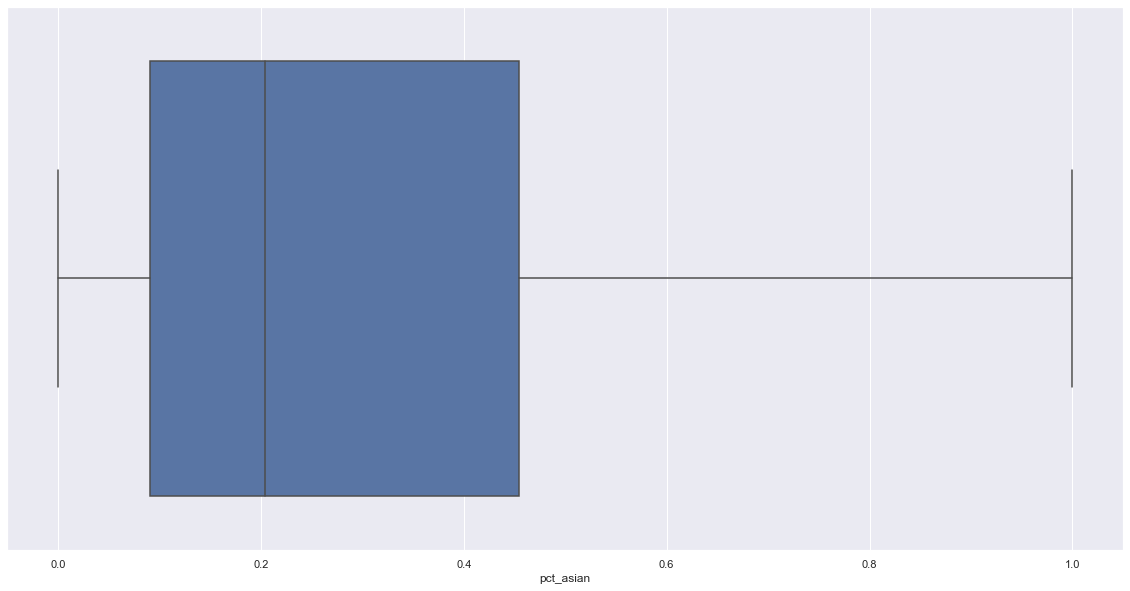

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=finaldf.pct_asian)
plt.show()

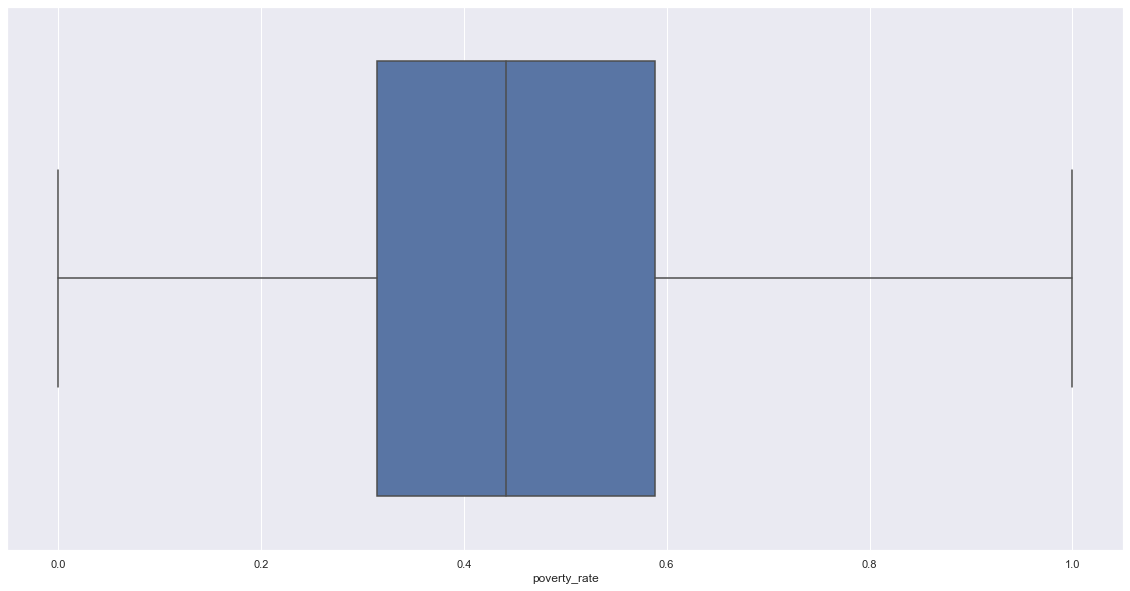

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=finaldf.poverty_rate)
plt.show()

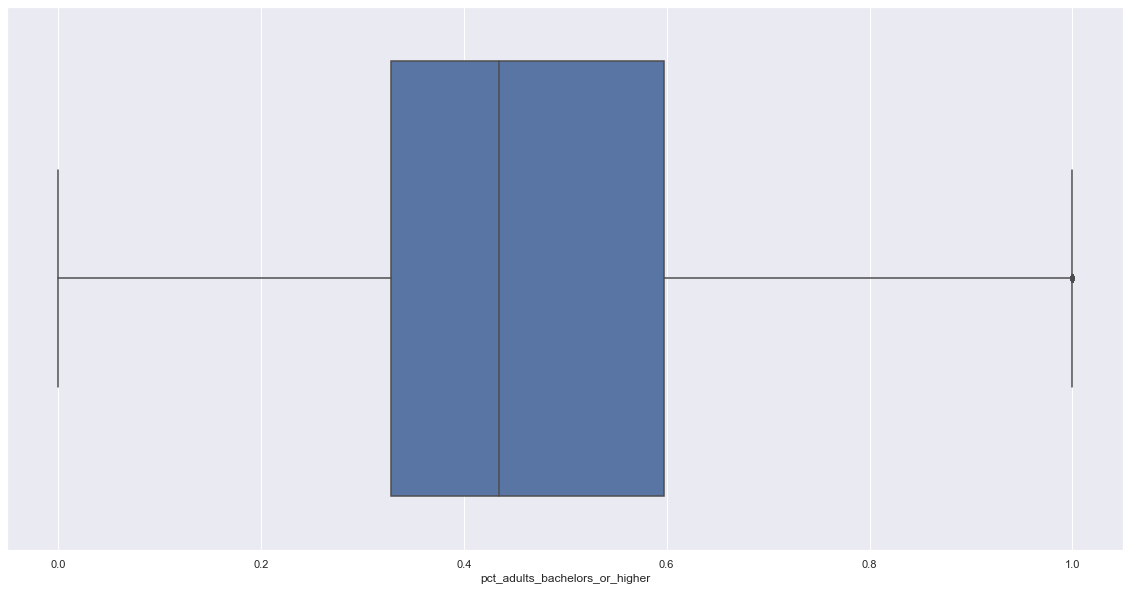

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x=finaldf.pct_adults_bachelors_or_higher)
plt.show()

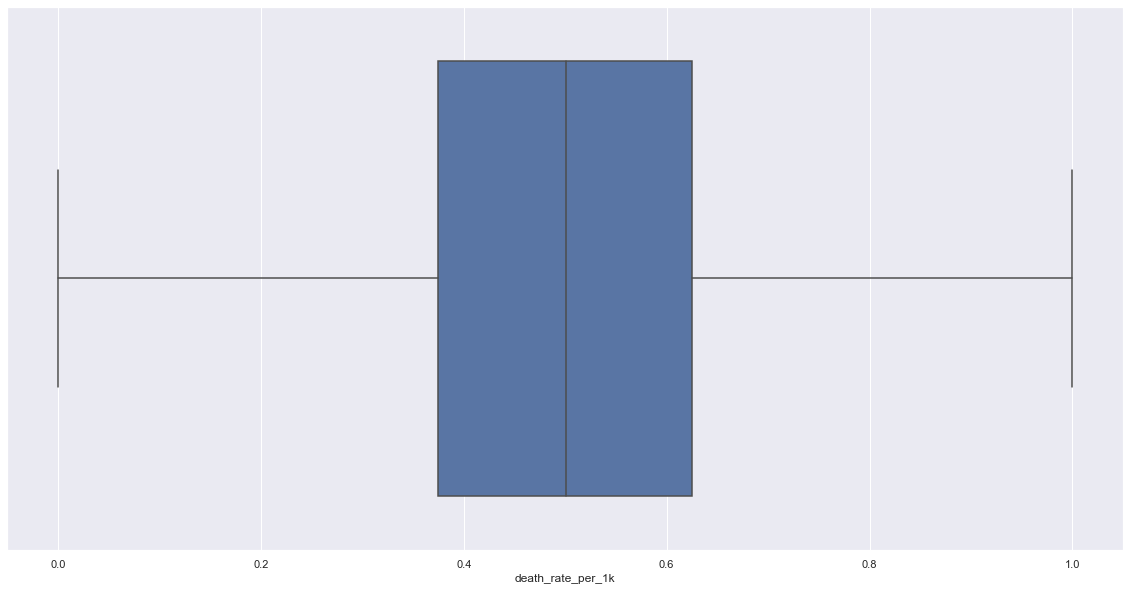

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=finaldf.death_rate_per_1k)
plt.show()

## Save to csv

In [27]:
#finaldf.to_csv('combinedscaled.csv',index=False)